# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns
!jupyter nbextension enable --py gmaps
!jupyter nbextension enable --py widgetsnbextension
# Import API key
from api_keys import weather_api_key
from api_keys import g_key

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [108]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [109]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

574

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [110]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=69cd9698c924287f4378983f23308b83&units=imperial&q=


In [111]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

City not found. Skipping...
Processing Record 1 of Set 1 | oranjestad
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | touros
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | griffith
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | noyabrsk
Processing Record 16 of Set 1 | ahuimanu
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | freeport
Processing Record 21 of Set 1 | gold coast
Processing Record 22 of Set 1 | bubaque
Processing Record 23 of Set 1 | khatanga
Processing Record 24

Processing Record 39 of Set 4 | madaoua
Processing Record 40 of Set 4 | dillon
Processing Record 41 of Set 4 | lata
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | huangchuan
City not found. Skipping...
Processing Record 44 of Set 4 | bagdarin
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | jumla
Processing Record 47 of Set 4 | udachnyy
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | kroya
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | dalvik
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | harper
Processing Record 6 of Set 5 | kloulklubed
Processing Record 7 of Set 5 | loa janan
Processing Record 8 of Set 5 | sangar
Processing Record 9 of Set 5 | hami
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | urumqi
Processing Record 13 of Set 5 | kidal
Processing Record 14 o

Processing Record 31 of Set 8 | tynda
Processing Record 32 of Set 8 | biak
Processing Record 33 of Set 8 | bonavista
Processing Record 34 of Set 8 | sharan
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | mount gambier
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | pechora
City not found. Skipping...
Processing Record 39 of Set 8 | manta
Processing Record 40 of Set 8 | gushikawa
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | kargil
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | odweyne
Processing Record 45 of Set 8 | chenghai
Processing Record 46 of Set 8 | foumban
City not found. Skipping...
Processing Record 47 of Set 8 | balkhash
Processing Record 48 of Set 8 | rawson
Processing Record 49 of Set 8 | north platte
Processing Record 1 of Set 9 | kirakira
Processing Record 2 of Set 9 | gizo
Processing Record 3 of Set 9 | solen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [59]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)  

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,19,LR,1579874357,17,6.65,-10.59,99.91,5.79
1,shetpe,100,KZ,1579874357,82,44.17,52.12,28.60,25.66
2,vanavara,100,RU,1579874358,95,60.34,102.28,8.20,5.88
3,banda aceh,0,IN,1579874358,56,25.48,80.33,56.70,4.43
4,garden city,90,DE,1579874358,93,53.69,12.05,41.00,8.05
5,qaanaaq,0,GL,1579874358,54,77.48,-69.36,-10.75,8.12
6,sao joaquim,0,IN,1579874358,43,20.51,76.21,71.51,4.61
7,dikson,100,RU,1579874358,97,73.51,80.55,-5.24,9.80
8,aktas,75,KZ,1579874358,79,49.78,72.96,28.40,26.84
9,meulaboh,77,ID,1579874040,68,4.14,96.13,85.26,4.70


In [113]:
# Exporting to CSV

weather_dataframe.to_csv("weather_df.csv")

In [114]:
# Checking New DataFrame & Cleaning the Data

weather_data = pd.read_csv("weather_df.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,19,LR,1579874357,17,6.65,-10.59,99.91,5.79
1,shetpe,100,KZ,1579874357,82,44.17,52.12,28.60,25.66
2,vanavara,100,RU,1579874358,95,60.34,102.28,8.20,5.88
3,banda aceh,0,IN,1579874358,56,25.48,80.33,56.70,4.43
4,garden city,90,DE,1579874358,93,53.69,12.05,41.00,8.05
5,qaanaaq,0,GL,1579874358,54,77.48,-69.36,-10.75,8.12
6,sao joaquim,0,IN,1579874358,43,20.51,76.21,71.51,4.61
7,dikson,100,RU,1579874358,97,73.51,80.55,-5.24,9.80
8,aktas,75,KZ,1579874358,79,49.78,72.96,28.40,26.84
9,meulaboh,77,ID,1579874040,68,4.14,96.13,85.26,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


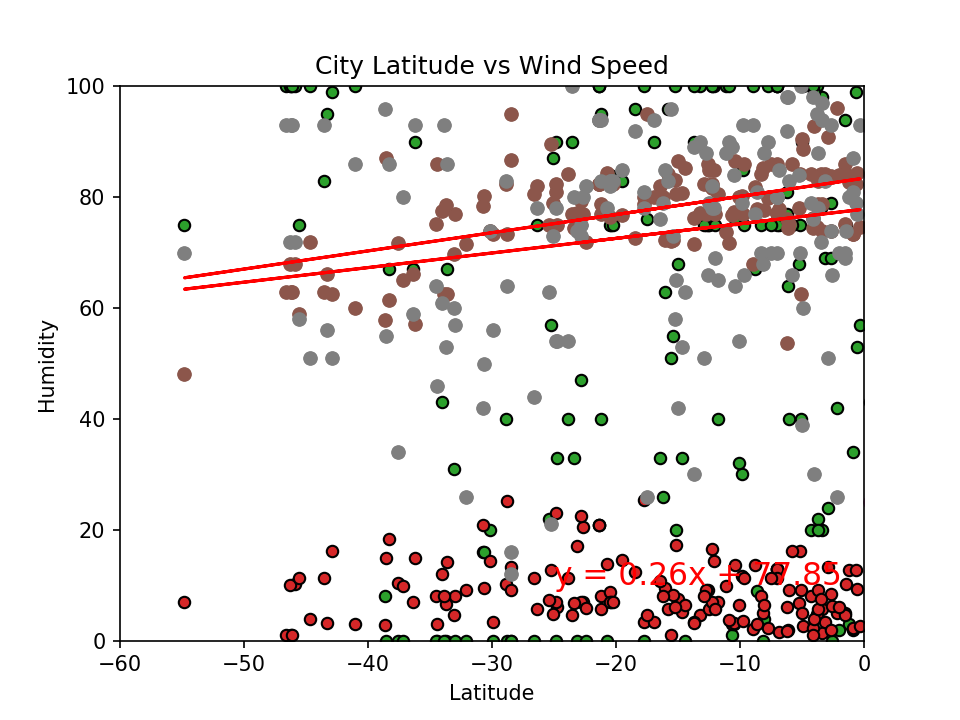

In [115]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("LAT vs TEMP.png")
plt.show()



#### Latitude vs. Humidity Plot

In [127]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('LAT vs HUM.png')
plt.show()

#### Latitude vs. Cloudiness Plot

In [117]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('LAT vs CLOUD.png')
plt.show()



#### Latitude vs. Wind Speed Plot

In [118]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('LAT vs WIND.png')

plt.show()



## Linear Regression

In [119]:
# OPTIONAL: Create a function to create Linear Regression plots
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
11,rikitea,0,PF,1579874359,74,-23.12,-134.97,77.22,17.16
13,vaini,40,TO,1579874359,83,-21.20,-175.20,78.80,8.05
15,atuona,30,PF,1579874359,79,-9.80,-139.03,80.31,11.65
17,dunedin,100,NZ,1579874359,72,-45.87,170.50,68.00,10.16
18,busselton,67,AU,1579874359,86,-33.65,115.33,62.58,14.18


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [120]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)


plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()
plt.savefig("NORTH MAX TEMP vs LAT.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [121]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SOUTH MAX TEMP vs LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [122]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NORTH HUM vs LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [123]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SOUTH HUM vs LAT.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [124]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NORTH CLOUD vs LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [125]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SOUTH CLOUD vs LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [126]:
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("NORTH WIND vs LAT.png")

ValueError: all the input array dimensions except for the concatenation axis must match exactly

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("SOUTH WIND vs LAT.png")